## 1.使用逻辑回归对手写数字进行分类

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## 2.数据预处理

In [2]:
# 加载数据X.mat和Y.mat
# X.mat是一个矩阵，每一行是一个样本，每一列是一个特征
# Y.mat是一个矩阵，每一行是一个样本，每一列是一个标签




# 加载数据
data_x = sio.loadmat('X.mat')
X = data_x['X']
data_y = sio.loadmat('Y.mat')
Y = data_y['Y']
Y = Y[0]

# 转换成dataframe
X = pd.DataFrame(X)

# 缺失值处理drop
X = X.dropna(axis=1, how='any')

# 数据归一化
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


## 3.划分训练集和测试集

In [3]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=2023)

In [4]:
print('训练集样本数：', train_x.shape[0])
print('测试集样本数：', test_x.shape[0])


训练集样本数： 1437
测试集样本数： 360


## 4.训练模型

In [5]:
# 使用逻辑回归对手写数字进行分类
from sklearn.linear_model import LogisticRegression


# 创建逻辑回归模型
lr = LogisticRegression(max_iter=1000)

# 训练模型
lr.fit(train_x, train_y)

# 预测
y_pred = lr.predict(test_x)

# 计算准确率
from sklearn.metrics import accuracy_score

print('sklearn逻辑回归准确率：', accuracy_score(test_y, y_pred))




sklearn逻辑回归准确率： 0.9777777777777777


In [6]:
# 手写逻辑回归
class MyLogisticRegression:
    # 初始化, learning_rate学习率，max_iter最大迭代次数
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    # sigmoid函数
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        # 初始化参数
        self.w = np.zeros(X.shape[1])
        self.b = 0

        # 迭代更新参数
        for i in range(self.max_iter):
            # 计算梯度
            y_hat = self.sigmoid(np.dot(X, self.w) + self.b)
            dw = np.dot(X.T, y_hat - y) / X.shape[0]
            db = np.sum(y_hat - y) / X.shape[0]

            # 更新参数
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    def predict(self, X):
        y_hat = self.sigmoid(np.dot(X, self.w) + self.b)
        y_pred = np.where(y_hat > 0.5, 1, 0)
        return y_pred

mylr = MyLogisticRegression()
mylr.fit(train_x, train_y)
y_pred = mylr.predict(test_x)
print('手写逻辑回归准确率：', accuracy_score(test_y, y_pred))

手写逻辑回归准确率： 0.08333333333333333


## 5.模型评估

In [7]:
# 性能度量指标选择准确率、召回率、F1值、ROC曲线、AUC值
# 准确率：预测正确的样本数/总样本数


# 逻辑回归的性能度量指标
from sklearn.metrics import accuracy_score, recall_score, f1_score

# 训练集上的预测
train_y_pred = lr.predict(train_x)
# 测试集上的预测
test_y_pred = lr.predict(test_x)

# 计算准确率
print("训练集准确率：", accuracy_score(train_y, train_y_pred))
print("测试集准确率：", accuracy_score(test_y, test_y_pred))



训练集准确率： 0.9826026443980515
测试集准确率： 0.9777777777777777


## 6.结果可视化

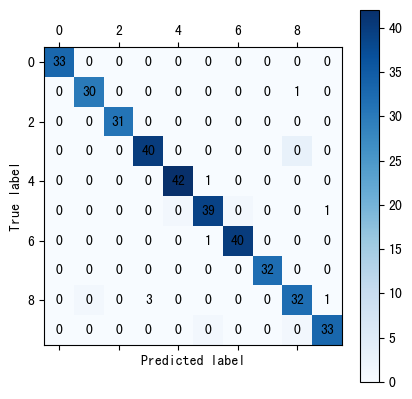

In [8]:
# 画出混淆矩阵
from sklearn.metrics import confusion_matrix


y_pred = lr.predict(test_x)

# 计算混淆矩阵
cm = confusion_matrix(test_y, y_pred)

# 画出混淆矩阵
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
# 添加数字标签
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.annotate(cm[x, y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



## 其他可视化

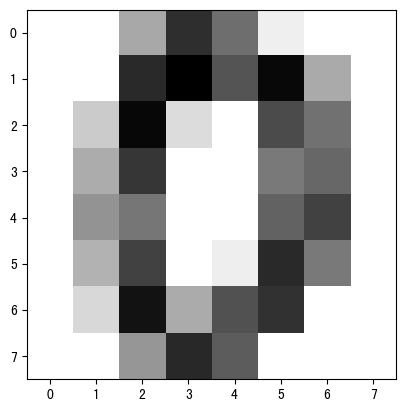

In [23]:
# 查看第一个数据的图像
plt.imshow(X[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

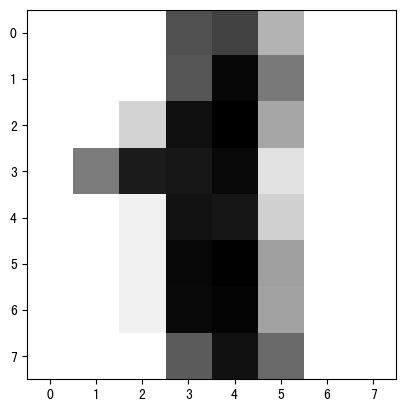

In [24]:
# 查看第二个数据的图像
plt.imshow(X[1].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

[5]


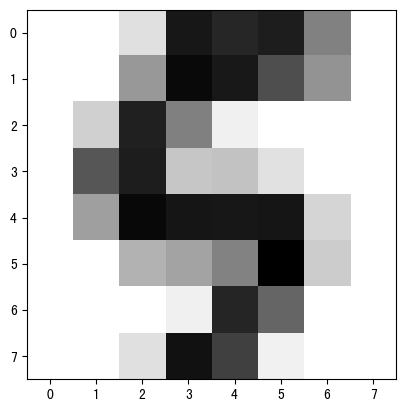

In [26]:
# 查看测试集中第一个数据的图像
plt.imshow(test_x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

# 对测试集中第一个数据进行预测
pred = lr.predict(test_x[0].reshape(1, -1))
print(pred)

In [ ]:
# 